<a href="https://colab.research.google.com/github/Tony-Jaime02/Actividad-1/blob/main/Actividad1_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crear un nuevo repositorio nuevo con el nombre: Actividad 1
 - https://github.com/Tony-Jaime02/Actividad-1.git
 
###Agregar el archivo: Listing.csv.gz de México ingresar a: http://insideairbnb.com/get-the-data/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dfMexico = pd.read_csv('/content/drive/MyDrive/Analitica datos Mod 2/Actividad1-Regresion DF/listings.csv')
dfMexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22943,697457011724147393,https://www.airbnb.com/rooms/697457011724147393,20220922013610,2022-09-22,city scrape,Depa seguro a 10 mns en auto del AICM,Fines de semana suenan los antros.<br /><br />...,"Tres santos, Oxxo, Banorte, servicios en gener...",https://a0.muscache.com/pictures/miso/Hosting-...,226551717,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
22944,22175774,https://www.airbnb.com/rooms/22175774,20220922013610,2022-09-22,city scrape,Comoda habitación con vista e iluminación natural,Comoda habitación con excelente iluminación na...,La colonia esta situada en la zona poniente de...,https://a0.muscache.com/pictures/49c556f0-bb75...,46746429,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.06
22945,1911707,https://www.airbnb.com/rooms/1911707,20220922013610,2022-09-22,city scrape,Beautiful house gardens & terraces,Once home to a native from Yucatan. Wonderfull...,NaN,https://a0.muscache.com/pictures/51159996/1811...,641535,...,4.93,4.81,4.81,NaN,f,1,1,0,0,0.27
22946,45285491,https://www.airbnb.com/rooms/45285491,20220922013610,2022-09-22,city scrape,Amplio Dpto a 5 min de Av P. de las Palmas/Par...,"El departamento es de dos plantas, en el prime...",NaN,https://a0.muscache.com/pictures/d5bdf63b-1b4f...,365965170,...,4.29,4.82,4.47,NaN,t,8,6,2,0,2.90


##Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers


In [3]:
#dfMexico = dfMexico.dropna()
#No se puede hacer un dropna así, porque nuestro dataframe contiene columnas totalmente vacías.

In [4]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

###Así que vamos a ir quitando columna por columna, hasta solo tener las necesarias para nuestro análisis.

In [5]:
dfMexico = dfMexico[['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication','room_type']]
dfMexico

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type
0,0,NaN,NaN,"$4,001.00",NaN,363,NaN,Entire home/apt
1,27,100%,4.96,$500.00,4.93,363,4.93,Private room
2,144,67%,4.73,$599.00,4.70,323,4.91,Private room
3,58,79%,4.59,"$18,000.00",4.70,331,4.75,Entire home/apt
4,61,100%,4.85,$740.00,4.80,314,4.95,Entire home/apt
...,...,...,...,...,...,...,...,...
22943,0,NaN,NaN,$450.00,NaN,365,NaN,Shared room
22944,3,NaN,5.00,$750.00,5.00,89,5.00,Private room
22945,28,100%,4.89,"$5,041.00",4.96,348,4.93,Entire home/apt
22946,72,99%,4.44,"$1,100.00",4.64,361,4.29,Entire home/apt


In [6]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  int64  
 1   host_acceptance_rate         20483 non-null  object 
 2   review_scores_rating         18881 non-null  float64
 3   price                        22948 non-null  object 
 4   review_scores_cleanliness    18787 non-null  float64
 5   availability_365             22948 non-null  int64  
 6   review_scores_communication  18787 non-null  float64
 7   room_type                    22948 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


####Una vez que tenemos las columnas que necesitamos, descubrimos que *'host_acceptance_rate'* y *'price'* no son variables númericas 

###Nulos

In [7]:
def nulos(df):
    df = df.fillna(method="bfill")
    df = df.fillna(method="ffill") 
    valores_nulos=df.isnull().sum()
    print(valores_nulos)
    return df

In [8]:
dfMexico = nulos(dfMexico)

number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


###Funciones para limpiar los datos y transformarlos de strings a numéricos

In [9]:
def limpiaPrice(df, columna):
    for i in range(0, len(df[columna])):
        df[columna][i] = df[columna][i][1:]#Se quita el $
        df[columna][i] = df[columna][i].replace(',','')#Elimina las comas
        
    df[columna] = pd.to_numeric(df[columna], downcast='float')
    return df

In [10]:
def limpiaHostAcepRate(df, columna):
    for i in range(0, len(df[columna])):
        if df[columna][i] == 'NaN':
            pass
        else:
            df[columna][i] = str(df[columna][i])
            df[columna][i] = df[columna][i][:-1]#Se quita el %
            df[columna][i] = float(df[columna][i])
    
    df = nulos(df)
    df[columna] = pd.to_numeric(df[columna], downcast='float')
    return df

In [11]:
dfMexico = limpiaPrice(dfMexico, 'price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
dfMexico = limpiaHostAcepRate(dfMexico,'host_acceptance_rate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


###Aquí comprobamos que las columnas se actualizaron al tipo correcto y no cambiaron los valores.

In [13]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  int64  
 1   host_acceptance_rate         22948 non-null  float32
 2   review_scores_rating         22948 non-null  float64
 3   price                        22948 non-null  float32
 4   review_scores_cleanliness    22948 non-null  float64
 5   availability_365             22948 non-null  int64  
 6   review_scores_communication  22948 non-null  float64
 7   room_type                    22948 non-null  object 
dtypes: float32(2), float64(3), int64(2), object(1)
memory usage: 1.2+ MB


###Outliers

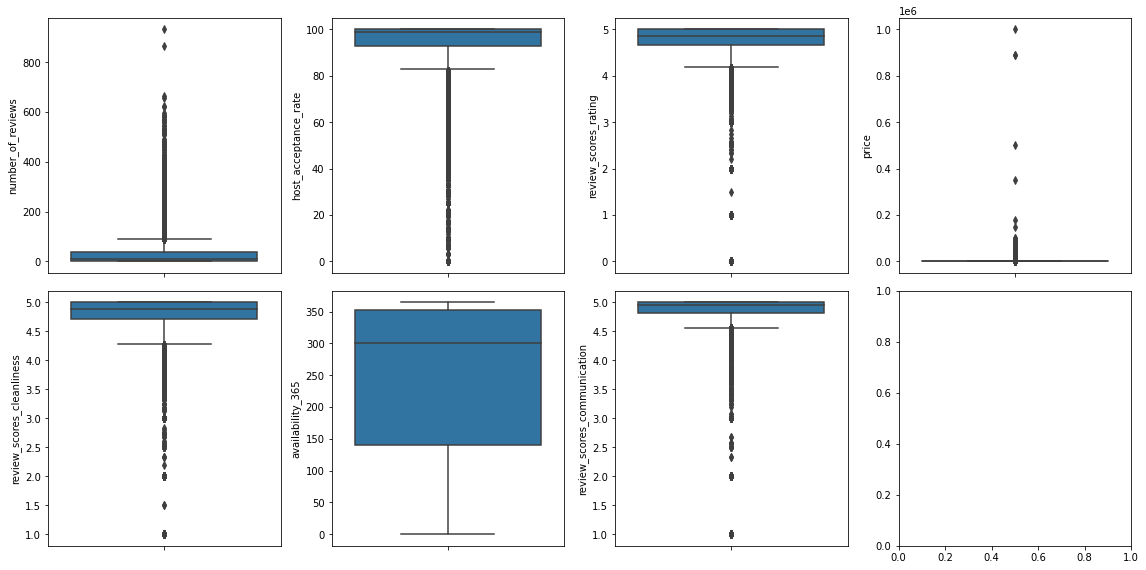

In [14]:
# Veamos distribuciones con Boxplots
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfMexico[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfMexico[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

In [15]:
def outliers(df):
    y=df.drop('room_type', axis=1)
    percentile25=y.quantile(0.25) #Q1
    percentile75=y.quantile(0.75) #Q3
    iqr= percentile75 - percentile25

    Limite_Superior_iqr= percentile75 + 3.5*iqr
    Limite_Inferior_iqr= percentile25 - 3.5*iqr
    print("Limite superior permitido", Limite_Superior_iqr)
    print("\nLimite inferior permitido", Limite_Inferior_iqr)

    df2 = y.copy()
    df2 = df2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
    df2 = df2.fillna(round(df.mean(),1))
    df2['room_type'] = df['room_type']
    print('\n',df2.info())
    return df2    

In [16]:
dfMexico = outliers(dfMexico)

Limite superior permitido number_of_reviews               163.000
host_acceptance_rate            124.500
review_scores_rating              6.155
price                          4955.000
review_scores_cleanliness         6.015
availability_365               1098.500
review_scores_communication       5.630
dtype: float64

Limite inferior permitido number_of_reviews              -125.000
host_acceptance_rate             68.500
review_scores_rating              3.515
price                         -2965.000
review_scores_cleanliness         3.695
availability_365               -605.500
review_scores_communication       4.190
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  float64
 1   host_acceptance_rate         22948 non-null  float32
 2   review_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


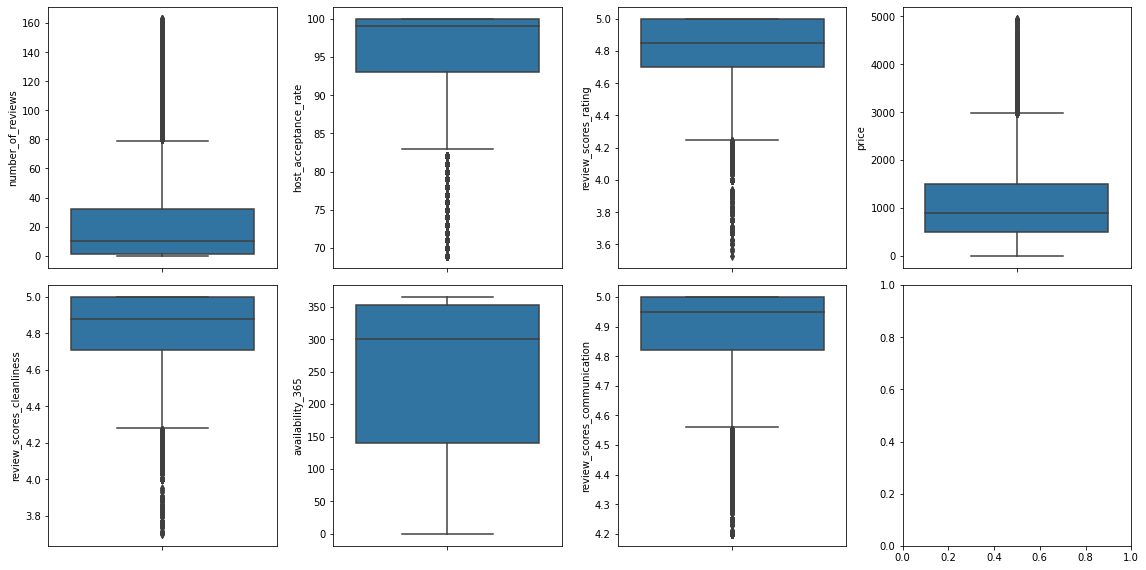

In [17]:
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfMexico[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfMexico[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

##Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

##Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación.


###Separación

In [18]:
dfMexico.groupby('room_type')['room_type'].count()

room_type
Entire home/apt    14118
Hotel room           172
Private room        8316
Shared room          342
Name: room_type, dtype: int64

In [19]:
def separarAlojamiento(df):
    #Hotel room
    dfE = df[df['room_type'] == 'Entire home/apt']
    #Private room
    dfP = df[df['room_type'] == 'Private room']
    #Shared room
    dfS = df[df['room_type'] == 'Shared room']

    return dfE, dfP, dfS

###Regresión

In [20]:
def rsquared(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [21]:
def regresion(df, var1, var2, c):
    x = np.array(df[var1]).reshape(-1, 1)
    y = np.array(df[var2]).reshape(-1, 1)

    reg = LinearRegression().fit(x, y) #fit = min cuadrados
    y_pred = reg.predict(x)

    R2 = rsquared(y, y_pred)
    SE = y.std() * ((1-R2)**0.5)

    # Graficamos
    fig, ax = plt.subplots()
    ax.set_title(var2 + ' vs ' + var1)
    ax.set_xlabel(var2)
    ax.set_ylabel(var1)

    ax.scatter(x, y, color = c)
    ax.plot(x, y_pred, c='red')
    print('R2: ',R2)
    print('SE: ', SE)

###Correlación

In [22]:
def correlacion(df):
    plt.figure(figsize=(10,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),annot = True, lw=1, mask=mask, cmap='viridis_r')
    plt.title('Correlation Map')

In [23]:
dfMexicoE, dfMexicoP, dfMexicoS = separarAlojamiento(dfMexico)

###Mexico - Entire Home/Apt

####“number_of_reviews vs host_acceptance_rate”

R2:  0.013377469310791756
SE:  34.30232527974219


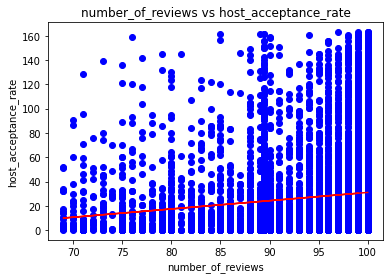

In [24]:
regresion(dfMexicoE, 'host_acceptance_rate', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_rating”


R2:  7.553126484372008e-05
SE:  34.53278815788376


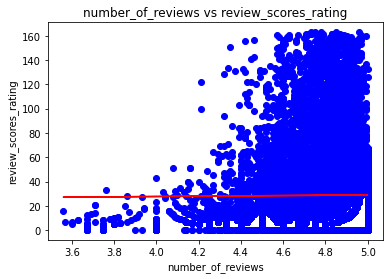

In [25]:
regresion(dfMexicoE, 'review_scores_rating', 'number_of_reviews', 'blue')

####“number_of_reviews vs price”


R2:  0.004499384505072479
SE:  34.45631371659841


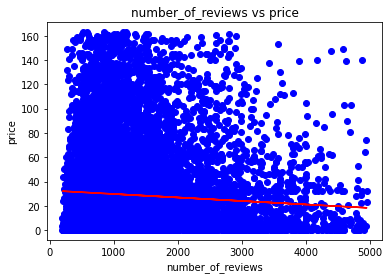

In [26]:
regresion(dfMexicoE, 'price', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_cleanliness”


R2:  0.00012807548196125396
SE:  34.5318808282738


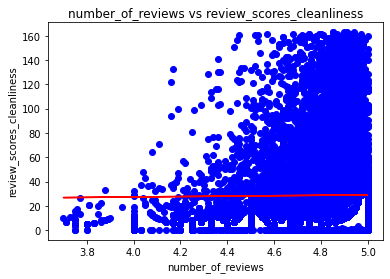

In [27]:
regresion(dfMexicoE, 'review_scores_cleanliness', 'number_of_reviews', 'blue')

####“number_of_reviews vs availability_365”

R2:  0.00684994346730794
SE:  34.415610847474476


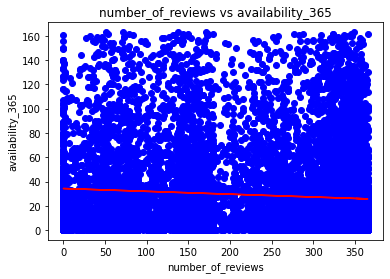

In [28]:
regresion(dfMexicoE, 'availability_365', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_communication”

R2:  0.0010537206086517203
SE:  34.515892946383126


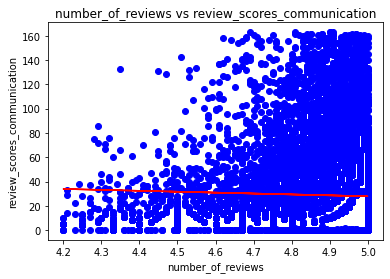

In [29]:
regresion(dfMexicoE, 'review_scores_communication', 'number_of_reviews', 'blue')

####Correlacion

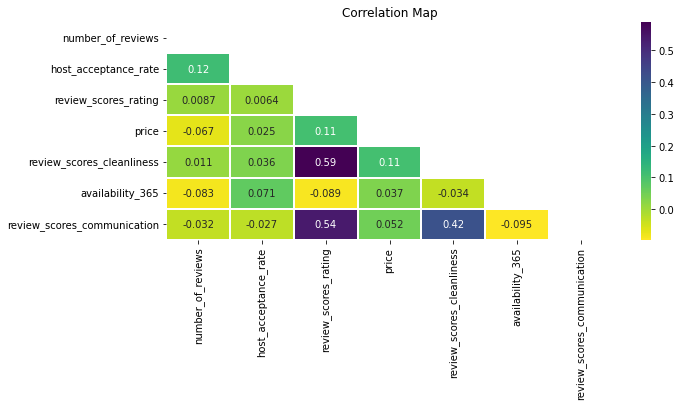

In [30]:
correlacion(dfMexicoE)

###Mexico - Private Room

####“number_of_reviews vs host_acceptance_rate”

R2:  0.009078409298186818
SE:  26.721884876074185


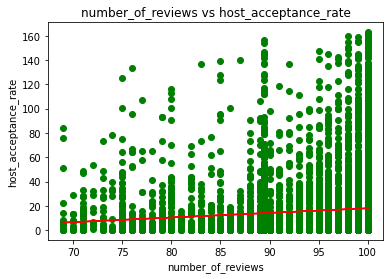

In [31]:
regresion(dfMexicoP, 'host_acceptance_rate', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_rating”


R2:  1.911622080075226e-06
SE:  26.843987502197418


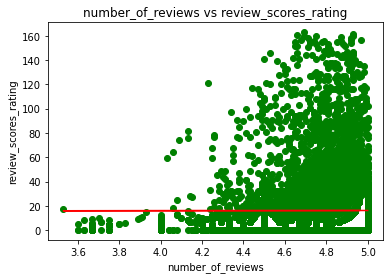

In [32]:
regresion(dfMexicoP, 'review_scores_rating', 'number_of_reviews', 'green')

####“number_of_reviews vs price”


R2:  0.0100476953411065
SE:  26.70881245576298


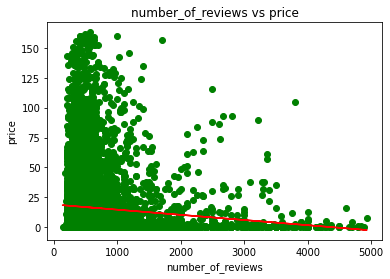

In [33]:
regresion(dfMexicoP, 'price', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_cleanliness”


R2:  1.8203328355781423e-07
SE:  26.84401071676178


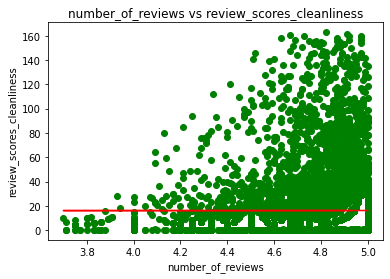

In [34]:
regresion(dfMexicoP, 'review_scores_cleanliness', 'number_of_reviews', 'green')

####“number_of_reviews vs availability_365”

R2:  0.008049049340263625
SE:  26.73576049393369


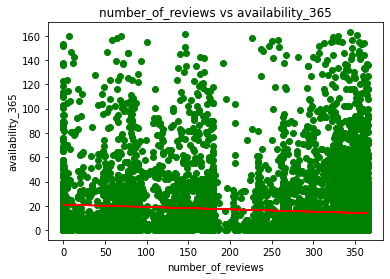

In [35]:
regresion(dfMexicoP, 'availability_365', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_communication”

R2:  0.0038489159268182416
SE:  26.792303180307222


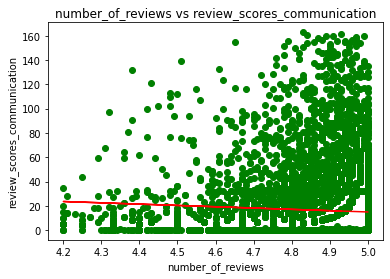

In [36]:
regresion(dfMexicoP, 'review_scores_communication', 'number_of_reviews', 'green')

####Correlacion

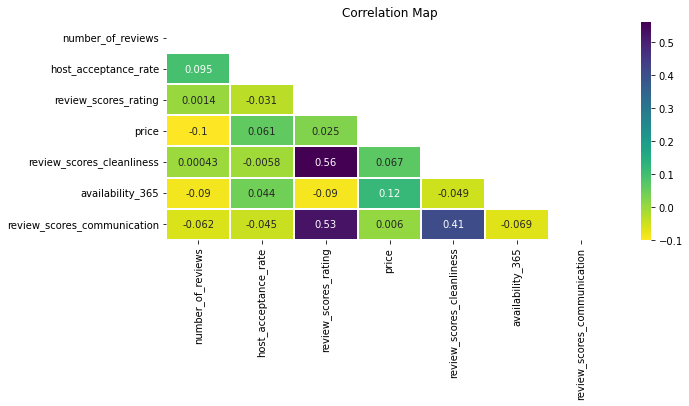

In [37]:
correlacion(dfMexicoP)

###Mexico - Shared Room

####“number_of_reviews vs host_acceptance_rate”

R2:  0.008868225465013313
SE:  16.00113352042503


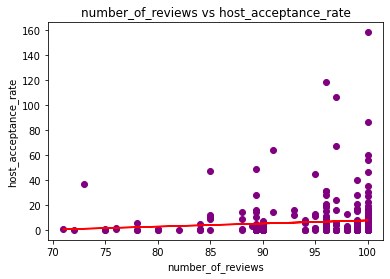

In [38]:
regresion(dfMexicoS, 'host_acceptance_rate', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_rating”


R2:  0.00328076996704485
SE:  16.046172925255004


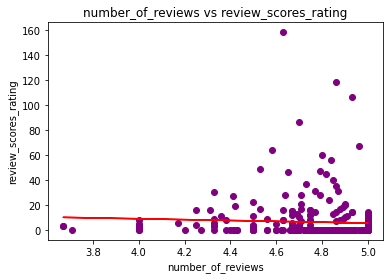

In [39]:
regresion(dfMexicoS, 'review_scores_rating', 'number_of_reviews', 'purple')

####“number_of_reviews vs price”


R2:  0.0065911802149151155
SE:  16.019503631860104


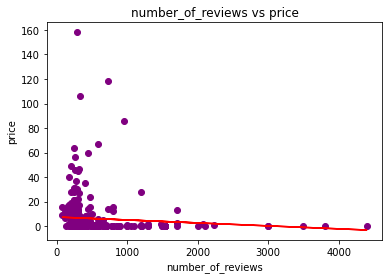

In [40]:
regresion(dfMexicoS, 'price', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_cleanliness”


R2:  0.0034054268113477004
SE:  16.04516946923373


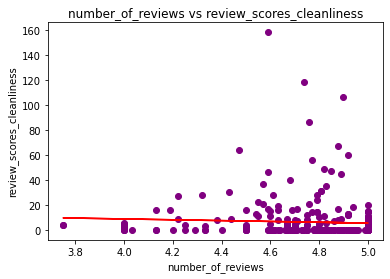

In [41]:
regresion(dfMexicoS, 'review_scores_cleanliness', 'number_of_reviews', 'purple')

####“number_of_reviews vs availability_365”

R2:  0.002176537351238017
SE:  16.055058979718336


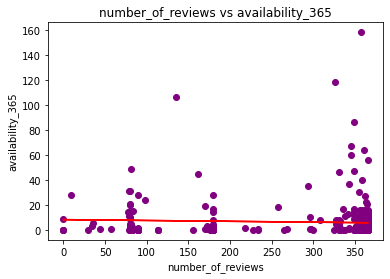

In [42]:
regresion(dfMexicoS, 'availability_365', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_communication”

R2:  0.01523914874500043
SE:  15.94962354756024


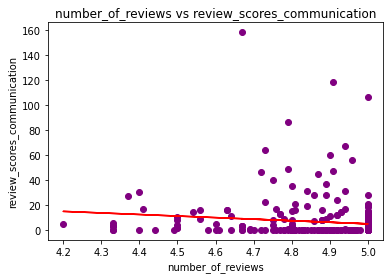

In [43]:
regresion(dfMexicoS, 'review_scores_communication', 'number_of_reviews', 'purple')

####Correlacion

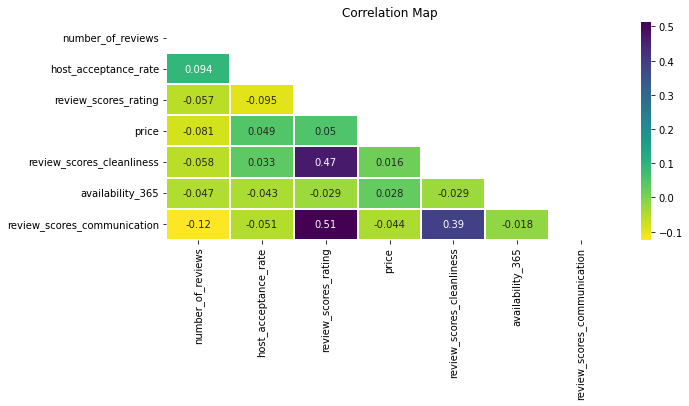

In [44]:
correlacion(dfMexicoS)

##Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación.


###México - Entire Home

- “number_of_reviews vs host_acceptance_rate”
    - Correlación: 0.12
    - R2: 0.013
- “number_of_reviews  vs review_scores_rating”
    - Correlación: 0.0087
    - R2: 7.55e-05
- “number_of_reviews  vs price”
    - Correlación: -0.67
    - R2: 0.0044
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación: 0.011
    - R2: 0.00012
- “number_of_reviews  vs availability_365”
    - Correlación: -0.083
    - R2: 0.0068
- “number_of_reviews  vs review_scores_communication”
    - Correlación: -0.032
    - R2: 0.0010

###México - Private Room

- “number_of_reviews vs host_acceptance_rate”
    - Correlación: 0.094
    - R2: 0.0090
- “number_of_reviews  vs review_scores_rating”
    - Correlación: 0.00014
    - R2: 1.91e-06
- “number_of_reviews  vs price”
    - Correlación: -0.1
    - R2: 0.010
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación: 0.00043
    - R2: 1.82e-07
- “number_of_reviews  vs availability_365”
    - Correlación: 0.09
    - R2: 0.0080
- “number_of_reviews  vs review_scores_communication”
    - Correlación: -0.062
    - R2: 0.0038

###México - Shared Room

- “number_of_reviews vs host_acceptance_rate”
    - Correlación: 0.094
    - R2: 0.0088
- “number_of_reviews  vs review_scores_rating”
    - Correlación: -0.057
    - R2: 0.0032
- “number_of_reviews  vs price”
    - Correlación: -0.081
    - R2: 0.0065
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación: -0.058
    - R2: 0.0034
- “number_of_reviews  vs availability_365”
    - Correlación: -0.047
    - R2: 0.0021
- “number_of_reviews  vs review_scores_communication”
    - Correlación: -0.12
    - R2: 0.015

##Implementar el mismo análisis para 2 ciudades de tu elección


###Berlín

In [45]:
dfBerlin = pd.read_csv('/content/drive/MyDrive/Analitica datos Mod 2/Actividad1-Regresion DF/listingsBerlin.csv')
dfBerlin

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,652868795892201022,https://www.airbnb.com/rooms/652868795892201022,20220915162225,2022-09-15,city scrape,Kleine Auszeit? Oder Business-Trip? Alles mögl...,"Hallo ihr Lieben,<br /><br />kommt und verbrin...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,21708794,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,29077694,https://www.airbnb.com/rooms/29077694,20220915162225,2022-09-16,previous scrape,Wohnung im Grünen nah an der Metropole,Wohnung befindet sich im Souterrain eines Einf...,"We live in a green, quite and save area with ...",https://a0.muscache.com/pictures/e2642fca-3833...,219116245,...,4.93,4.52,4.66,NaN,f,1,1,0,0,0.63
2,27080612,https://www.airbnb.com/rooms/27080612,20220915162225,2022-09-15,city scrape,Apartment with Living/Sleeping Room & own Kitchen,The well-equipped 30 m² large Apartment is loc...,The Apartment is located in a quiet area close...,https://a0.muscache.com/pictures/c08faa7a-40c0...,130216168,...,4.99,4.79,4.92,NaN,t,2,2,0,0,2.54
3,665648367391379321,https://www.airbnb.com/rooms/665648367391379321,20220915162225,2022-09-15,city scrape,Schöne Eigentumswohnung mit Balkon,Wenn du in dieser zentral gelegenen Unterkunft...,NaN,https://a0.muscache.com/pictures/55e91f59-55dd...,106965422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
4,3176,https://www.airbnb.com/rooms/3176,20220915162225,2022-09-15,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.63,NaN,f,1,1,0,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16675,2650812,https://www.airbnb.com/rooms/2650812,20220915162225,2022-09-16,city scrape,Gäste-Zimmer ALEXA 2,Für den angenehmen Aufenthalt haben wir ein Ei...,NaN,https://a0.muscache.com/pictures/57614015/7b57...,13569320,...,NaN,NaN,NaN,NaN,f,4,1,3,0,NaN
16676,39853201,https://www.airbnb.com/rooms/39853201,20220915162225,2022-09-16,city scrape,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",Die 112qm große 3-Raum-EG-Wohnung liegt direkt...,"Es ist eine ruhige Wohnstrasse, meist mit Ein...",https://a0.muscache.com/pictures/675fbea4-7978...,89818386,...,5.00,5.00,4.70,NaN,f,1,1,0,0,0.87
16677,2855881,https://www.airbnb.com/rooms/2855881,20220915162225,2022-09-16,city scrape,Gäste-Zimmer ALEXA 4,Unser Zuhause in Schönblick bietet zusätzlich ...,Der Ortsteil Schönblick in Woltersdorf (Schleu...,https://a0.muscache.com/pictures/57599998/e8e1...,13569320,...,NaN,NaN,NaN,NaN,f,4,1,3,0,NaN
16678,46313178,https://www.airbnb.com/rooms/46313178,20220915162225,2022-09-16,city scrape,TESLA / Grünheide Wohnung hochwertig möbliert,Tolle neue hochwertig Design-möblierte Wohnung...,Sehr ruhige idyllische Straße mit netten Nachb...,https://a0.muscache.com/pictures/f2d8fdcd-4e6c...,87267772,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [46]:
dfBerlin = dfBerlin[['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication','room_type']]
dfBerlin

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type
0,0,100%,NaN,$88.00,NaN,6,NaN,Entire home/apt
1,29,100%,4.79,$36.00,4.52,6,4.93,Entire home/apt
2,126,100%,4.98,$60.00,4.98,163,4.99,Entire home/apt
3,0,100%,NaN,$120.00,NaN,257,NaN,Entire home/apt
4,147,0%,4.63,$150.00,4.53,350,4.69,Entire home/apt
...,...,...,...,...,...,...,...,...
16675,0,17%,NaN,$99.00,NaN,351,NaN,Private room
16676,23,86%,5.00,$160.00,4.96,148,5.00,Entire home/apt
16677,0,17%,NaN,$195.00,NaN,336,NaN,Private room
16678,0,NaN,NaN,$60.00,NaN,288,NaN,Entire home/apt


In [47]:
dfBerlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  int64  
 1   host_acceptance_rate         9196 non-null   object 
 2   review_scores_rating         13812 non-null  float64
 3   price                        16680 non-null  object 
 4   review_scores_cleanliness    13563 non-null  float64
 5   availability_365             16680 non-null  int64  
 6   review_scores_communication  13561 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ MB


In [48]:
dfBerlin = nulos(dfBerlin)

number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


In [49]:
dfBerlin = limpiaPrice(dfBerlin, 'price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
dfBerlin = limpiaHostAcepRate(dfBerlin,'host_acceptance_rate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


In [51]:
dfBerlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  int64  
 1   host_acceptance_rate         16680 non-null  float32
 2   review_scores_rating         16680 non-null  float64
 3   price                        16680 non-null  float32
 4   review_scores_cleanliness    16680 non-null  float64
 5   availability_365             16680 non-null  int64  
 6   review_scores_communication  16680 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float32(2), float64(3), int64(2), object(1)
memory usage: 912.3+ KB


In [52]:
dfBerlin = outliers(dfBerlin)

Limite superior permitido number_of_reviews               95.500
host_acceptance_rate           226.000
review_scores_rating             6.365
price                          355.000
review_scores_cleanliness        6.750
availability_365               751.500
review_scores_communication      5.700
dtype: float64

Limite inferior permitido number_of_reviews              -72.500
host_acceptance_rate           -62.000
review_scores_rating             3.245
price                         -205.000
review_scores_cleanliness        2.750
availability_365              -584.500
review_scores_communication      4.100
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  float64
 1   host_acceptance_rate         16680 non-null  float32
 2   review_scores_rating      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


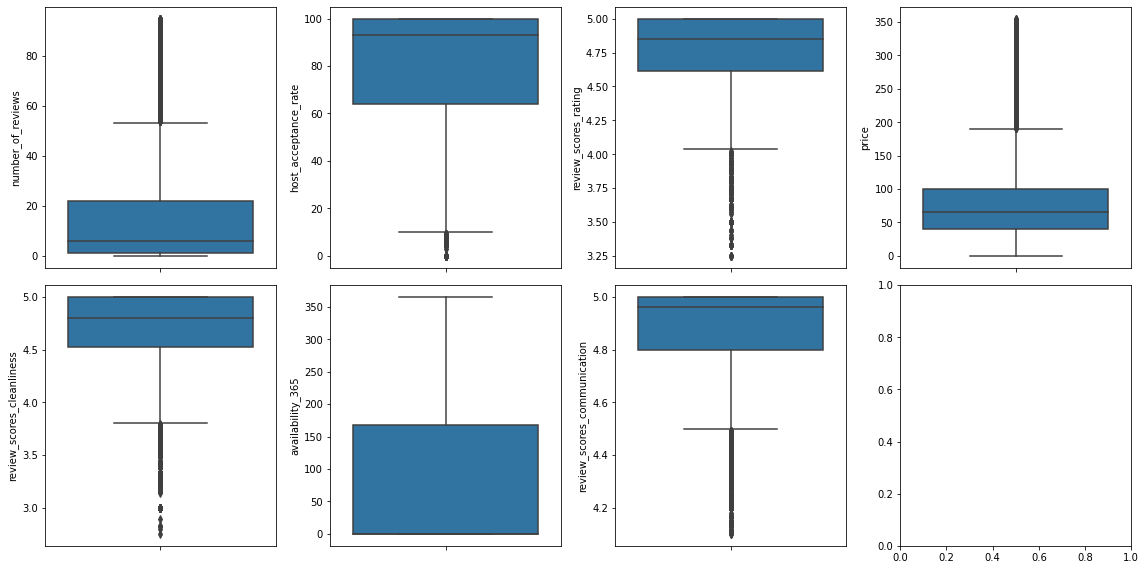

In [53]:
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfBerlin[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfBerlin[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

In [54]:
dfBerlinE, dfBerlinP, dfBerlinS = separarAlojamiento(dfBerlin)

In [55]:
def regresionMult(df, varsPred):
    columnas = ['host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']

    varDep = df['number_of_reviews']
    varsInd = df[columnas]

    model= LinearRegression()
    model.fit(X=varsInd, y=varDep)
    
    print(model.score(varsInd,varDep))

    y_pred= model.predict(X=df[columnas])

    for i in varsPred:
        sns.scatterplot(x=i, y='number_of_reviews', color="blue", data=df)
    sns.lineplot(x=df[varsPred[0]], y=y_pred, color="red", data=df)


0.08340483153512757


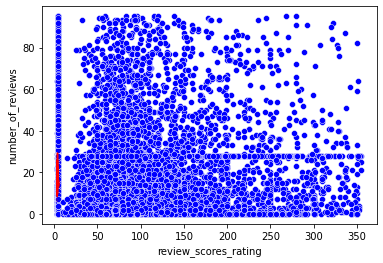

In [56]:
regresionMult(dfBerlinE, ['review_scores_rating', 'price'])

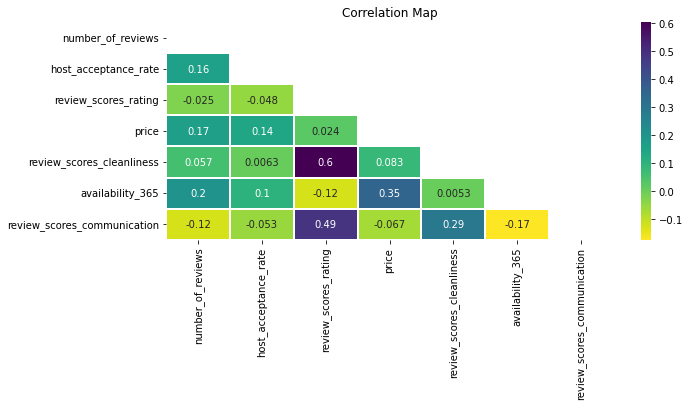

In [57]:
correlacion(dfBerlinE)

0.04927450133882261


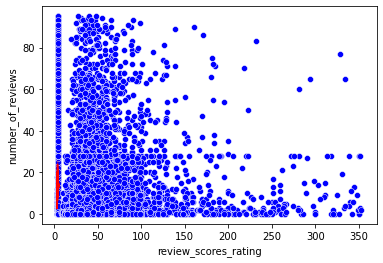

In [58]:
regresionMult(dfBerlinP, ['review_scores_rating', 'price'])

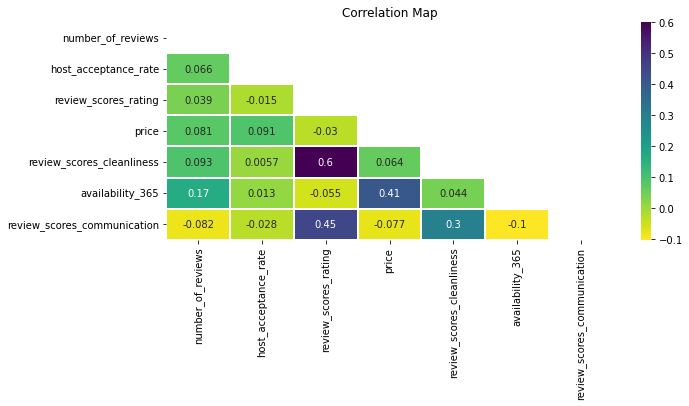

In [59]:
correlacion(dfBerlinP)

0.24687277876653668


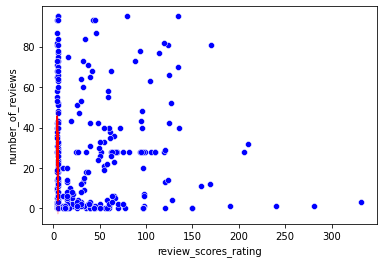

In [60]:
regresionMult(dfBerlinS, ['review_scores_rating', 'price'])

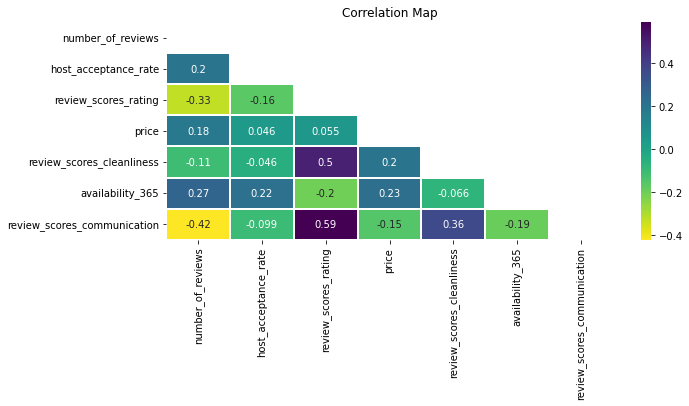

In [61]:
correlacion(dfBerlinS)

##Implementar el mismo análisis para 2 ciudades de tu elección


###Florence

In [62]:
dfFlorence = pd.read_csv('/content/drive/MyDrive/Analitica datos Mod 2/Actividad1-Regresion DF/listingsFlorence.csv')
dfFlorence

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10262403,https://www.airbnb.com/rooms/10262403,20220914194856,2022-09-14,city scrape,Villa Castiglione - Camera Deluxe vista giardino,Casa Vacanze sulle colline Toscane dove rilass...,"La tranquillità, il panorama la campagna e all...",https://a0.muscache.com/pictures/miso/Hosting-...,52763923,...,4.43,4.89,4.71,NaN,t,3,0,3,0,0.42
1,17976643,https://www.airbnb.com/rooms/17976643,20220914194856,2022-09-14,city scrape,Villa Palagio II - apartment 2 levels,Villa Palagio is an ancient building in natura...,NaN,https://a0.muscache.com/pictures/fdc47c2e-bde3...,1046601,...,5.00,4.90,4.76,NaN,t,2,2,0,0,0.35
2,693802725140450777,https://www.airbnb.com/rooms/693802725140450777,20220914194856,2022-09-14,city scrape,Villetta Gabriella-matrimoniale king-bagno pri...,Ideale per famiglie con un figlio,"Località ""Rose"" <br />Fermata bus n° 37 per st...",https://a0.muscache.com/pictures/miso/Hosting-...,11012232,...,5.00,4.50,4.00,NaN,f,2,0,2,0,2.00
3,52254709,https://www.airbnb.com/rooms/52254709,20220914194856,2022-09-14,city scrape,Elegant room with terrace and private bathroom,Relax in this quiet space in a central positio...,It is located in the heart of Fiesole.<br /><b...,https://a0.muscache.com/pictures/15ae0f4d-209a...,42188644,...,5.00,5.00,5.00,NaN,f,3,1,2,0,0.43
4,3558371,https://www.airbnb.com/rooms/3558371,20220914194856,2022-09-14,city scrape,"Relax totale: piscina panoramica, Firenze a 7 km","A 7 km da Firenze, il nostro Agriturismo è met...","Pur vicinissimi alla città, potrete trascorrer...",https://a0.muscache.com/pictures/miso/Hosting-...,17914360,...,4.83,4.92,4.67,NaN,t,5,0,5,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,32149955,https://www.airbnb.com/rooms/32149955,20220914194856,2022-09-14,city scrape,Casa Bonannia I in Grassina,Casa Bonannia I is a romantic and welcoming on...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,20933780,...,NaN,NaN,NaN,NaN,f,21,21,0,0,NaN
11134,2029050,https://www.airbnb.com/rooms/2029050,20220914194856,2022-09-15,city scrape,Due passi nel parco,Luminoso appartamento di 100 mq e ampio giardi...,Il quartiere a solo 4 km dal centro di Firenze...,https://a0.muscache.com/pictures/c34d07ad-53e9...,10414710,...,4.88,4.73,4.63,NaN,t,3,3,0,0,0.39
11135,43738682,https://www.airbnb.com/rooms/43738682,20220914194856,2022-09-14,city scrape,Farmhouse with pool close to Florence,This is a little oasis in Tuscany. The house i...,Ontignano is a village of less than 100 inhabi...,https://a0.muscache.com/pictures/2d417692-57bf...,33324074,...,5.00,4.91,4.82,NaN,f,1,1,0,0,0.45
11136,42343570,https://www.airbnb.com/rooms/42343570,20220914194856,2022-09-15,city scrape,Villa Castiglione - Camera Superior vista giar...,Casa Vacanze sulle colline Toscane dove rilass...,"La tranquillità, il panorama la campagna e all...",https://a0.muscache.com/pictures/4f955906-d2e3...,52763923,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN


In [63]:
dfFlorence = dfFlorence[['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication','room_type']]
dfFlorence

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type
0,32,100%,4.68,$260.00,4.71,325,4.43,Private room
1,21,100%,4.90,$95.00,5.00,225,5.00,Entire home/apt
2,2,100%,4.00,$100.00,4.50,344,5.00,Private room
3,4,90%,5.00,$80.00,5.00,344,5.00,Private room
4,12,100%,4.83,$80.00,4.92,220,4.83,Private room
...,...,...,...,...,...,...,...,...
11133,0,65%,NaN,$218.00,NaN,268,NaN,Entire home/apt
11134,41,100%,4.63,$55.00,4.83,123,4.88,Entire home/apt
11135,11,90%,5.00,$160.00,4.91,123,5.00,Entire home/apt
11136,0,100%,NaN,$223.00,NaN,327,NaN,Private room


In [64]:
dfFlorence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            11138 non-null  int64  
 1   host_acceptance_rate         9921 non-null   object 
 2   review_scores_rating         9601 non-null   float64
 3   price                        11138 non-null  object 
 4   review_scores_cleanliness    9555 non-null   float64
 5   availability_365             11138 non-null  int64  
 6   review_scores_communication  9553 non-null   float64
 7   room_type                    11138 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 696.2+ KB


In [65]:
dfFlorence = nulos(dfFlorence)

number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


In [66]:
dfFlorence = limpiaPrice(dfFlorence, 'price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
dfFlorence = limpiaHostAcepRate(dfFlorence,'host_acceptance_rate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


In [68]:
dfFlorence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            11138 non-null  int64  
 1   host_acceptance_rate         11138 non-null  float32
 2   review_scores_rating         11138 non-null  float64
 3   price                        11138 non-null  float32
 4   review_scores_cleanliness    11138 non-null  float64
 5   availability_365             11138 non-null  int64  
 6   review_scores_communication  11138 non-null  float64
 7   room_type                    11138 non-null  object 
dtypes: float32(2), float64(3), int64(2), object(1)
memory usage: 609.2+ KB


In [69]:
dfFlorence = outliers(dfFlorence)

Limite superior permitido number_of_reviews               309.000
host_acceptance_rate            121.000
review_scores_rating              6.175
price                           554.500
review_scores_cleanliness         6.065
availability_365               1226.500
review_scores_communication       5.735
dtype: float64

Limite inferior permitido number_of_reviews             -235.000
host_acceptance_rate            73.000
review_scores_rating             3.375
price                         -301.500
review_scores_cleanliness        3.585
availability_365              -893.500
review_scores_communication      4.055
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            11138 non-null  float64
 1   host_acceptance_rate         11138 non-null  float32
 2   review_scores_ratin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


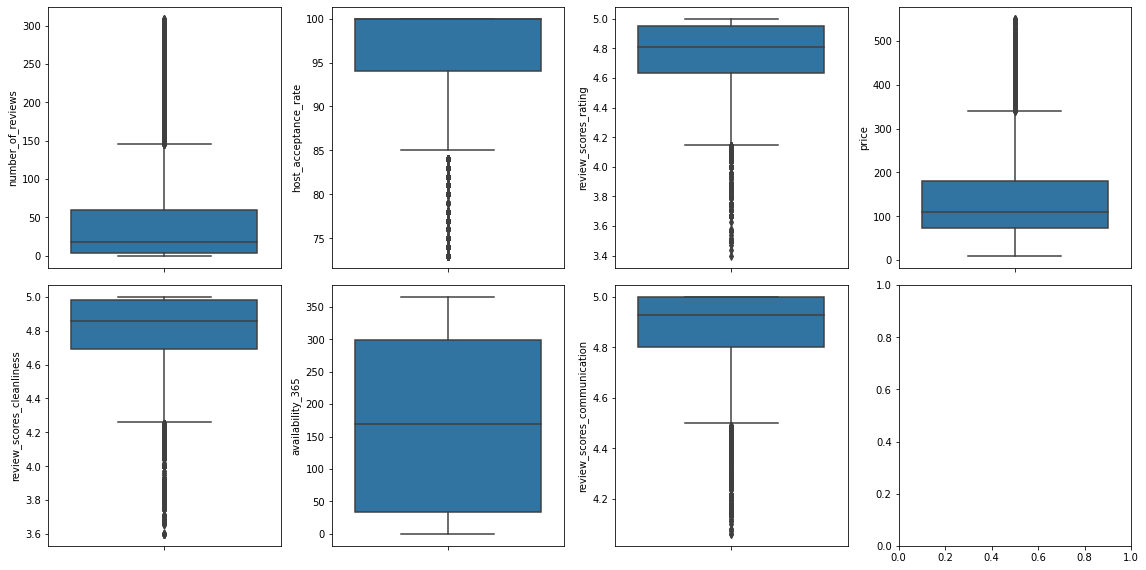

In [70]:
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfFlorence[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfFlorence[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

In [71]:
dfFlorenceE, dfFlorenceP, dfFlorenceS = separarAlojamiento(dfFlorence)

0.05737865907383555


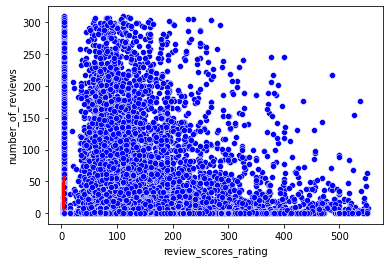

In [72]:
regresionMult(dfFlorenceE, ['review_scores_rating', 'price'])

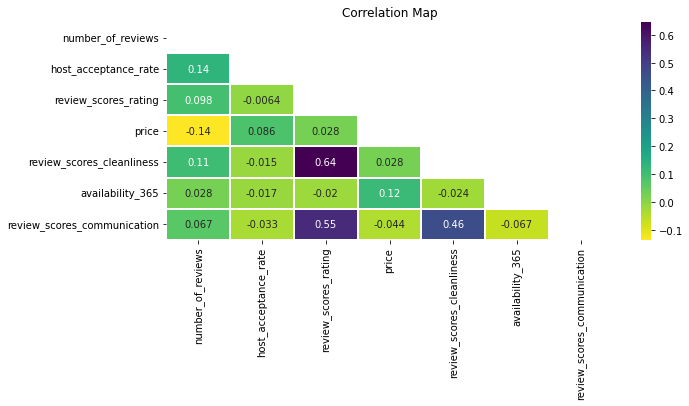

In [73]:
correlacion(dfFlorenceE)

0.05829454080911434


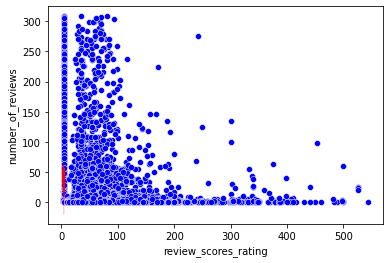

In [74]:
regresionMult(dfFlorenceP, ['review_scores_rating', 'price'])

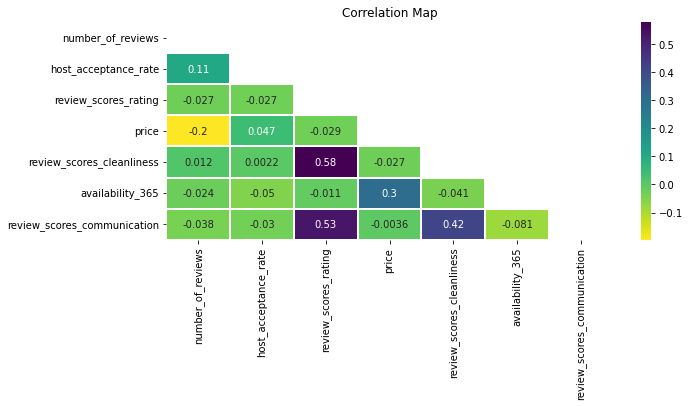

In [75]:
correlacion(dfFlorenceP)

0.10106942500226268


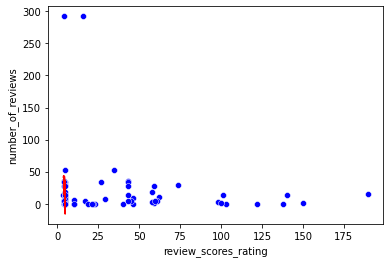

In [76]:
regresionMult(dfFlorenceS, ['review_scores_rating', 'price'])

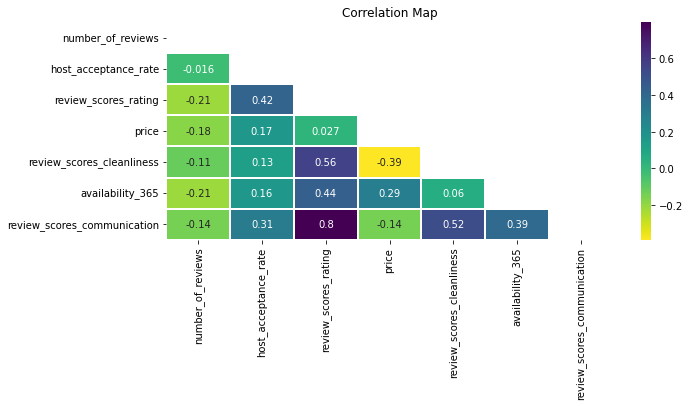

In [77]:
correlacion(dfFlorenceS)

##Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.


###Generar un reporte comparativo sobre el comportamiento de las ciudades elegidas respecto al D.F
###Subir el link del repositorio en CANVAS para “Evaluación”